# Exploratory Data Analysis II

## Setup

<p>For this lab, we will be using the following libraries:</p>
<ul>
    <li><code>skillsnetwork</code> for downloading the data.</li>
    <li><code>pandas</code> for managing the data.</li>
    <li><code>numpy</code> for methematical operations.</li>
    <li><code>scipy</code> for statistical operations.</li>
    <li><code>seaborn</code> for visualizing the data.</li>
    <li><code>matplotlib</code> for additional ploting tools.</li>
</ul>

### Importing Required Libraries

In [1]:
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import os

%matplotlib inline

### Importing the dataset

<p>The functions below will download the dataset onto your computer.</p>

In [2]:
dir_path = os.path.join(".", "data")
os.makedirs(dir_path, exist_ok=True)

def download_file(url: str) -> str:
    with requests.get(url=url, stream=True) as response:
        response.raise_for_status()

        filepath = os.path.join(dir_path, url.rsplit("/", 1)[-1])
        total_size = int(response.headers.get("Content-Length", 0))
        chunk_size = 1024 ** 2
        download_size = 0

        with open(filepath, "wb") as file:
            for chunk in response.iter_content(chunk_size=chunk_size):
                if not chunk:
                    continue

                file.write(chunk)
                download_size += len(chunk)

                if total_size > 0:
                    progress = (download_size / total_size) * 100
                    print(f"Downloading: {progress:.2f}% ({download_size} / {total_size} bytes)")

    print("Download Complete.")
    return filepath

<p>To obtain the dataset, utilize the <code>download_file()</code> function as defined above:</p>

In [3]:
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
filename = download_file(data_url)

Downloading: 100.00% (20119 / 20119 bytes)
Download Complete.


<p>Import the file to a <code>pandas.DataFrame</code>.</p>

In [4]:
df = pd.read_csv(filename, header=0)

<p>Print the first 5 entries of the dataset to confirm loading.</p>

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


## Task 1 - Visualize individual feature patterns

### Continuous valued features

<p>Generate regression plots for each of the parameters <code>CPU_frequency</code>, <code>Screen_Size_inch</code>, and <code>Weight_pounds</code> against <code>Price</code>. Also, print the value of correlation of each feature with <code>Price</code>.</p>

(0.0, 3974.15)

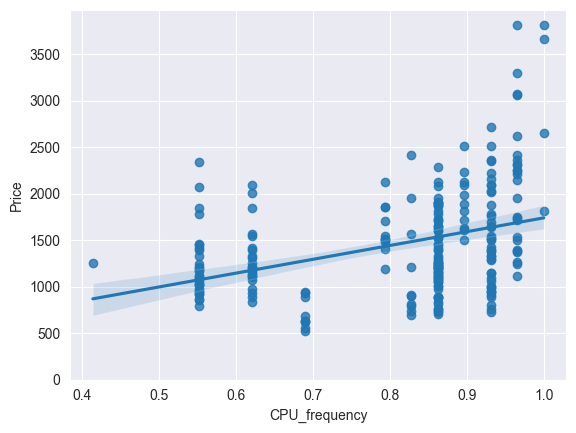

In [6]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(bottom=0)

(0.0, 3974.15)

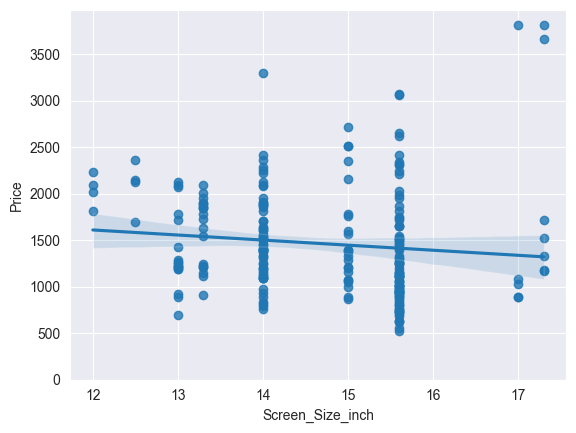

In [7]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(bottom=0)

(0.0, 3974.15)

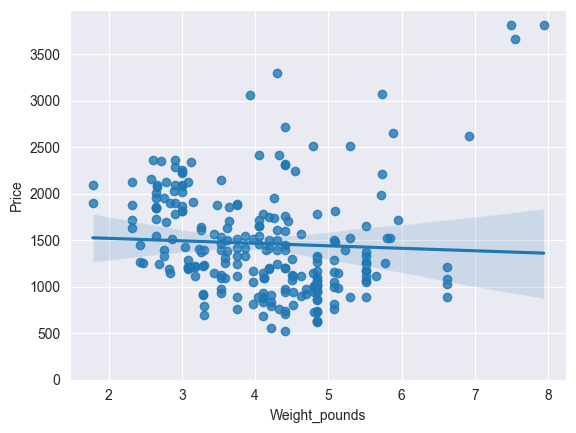

In [8]:
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(bottom=0)

In [9]:
count = 1
for parameter in ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]:
    print(f"{count}. The Correlation of Price and {parameter} is {df[[parameter, "Price"]].corr()}", end="\n\n")
    count += 1

1. The Correlation of Price and CPU_frequency is                CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000

2. The Correlation of Price and Screen_Size_inch is                   Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000

3. The Correlation of Price and Weight_pounds is                Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000



<p>Interpretation: <code>CPU_frequency</code> has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.</p>

### Categorical features

<p>Generate Box plots for the different feature that hold categorical values. These features would be <code>Category</code>, <code>GPU</code>, <code>OS</code>, <code>CPU_core</code>, <code>RAM_GB</code>, <code>Storage_GB_SSD</code>.</p>

<Axes: xlabel='Category', ylabel='Price'>

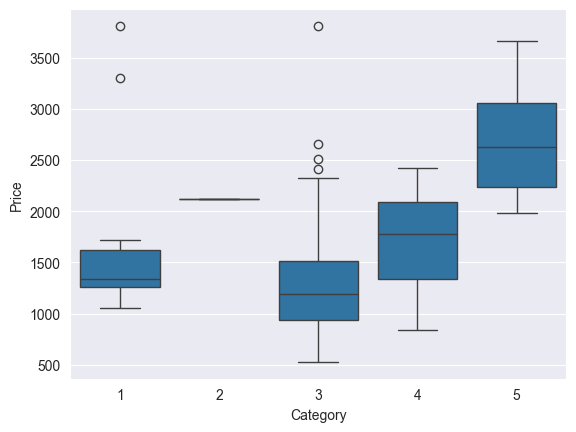

In [10]:
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

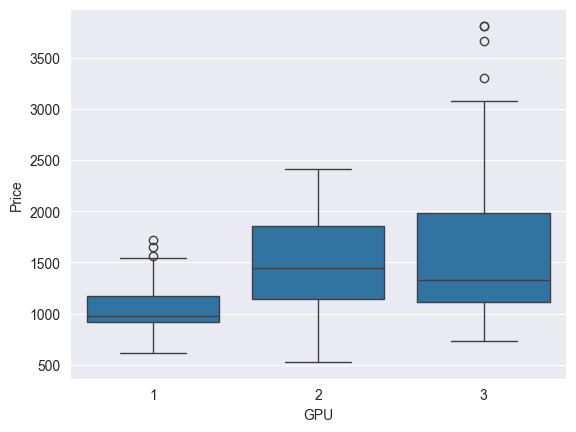

In [11]:
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

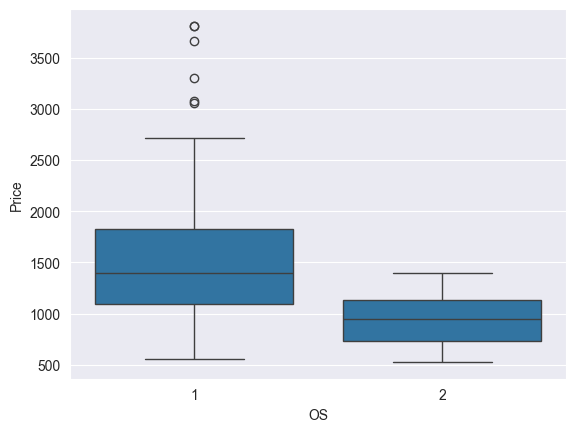

In [12]:
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

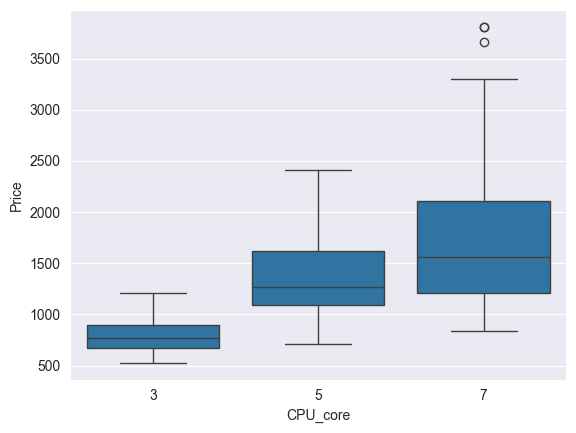

In [13]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

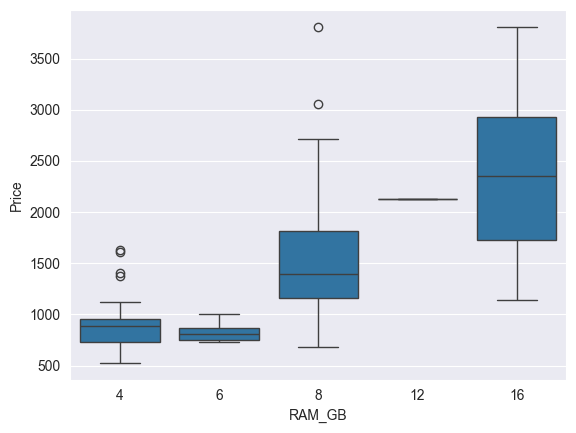

In [14]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

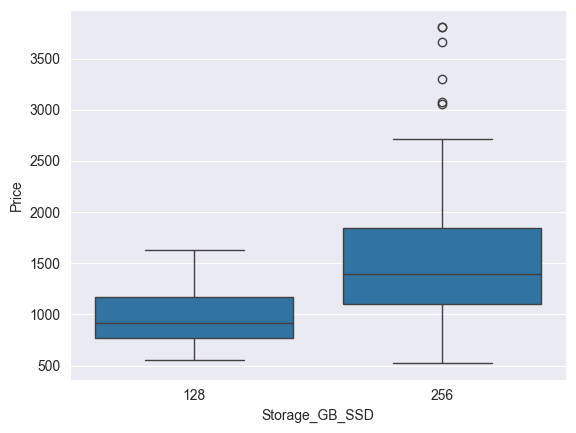

In [15]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

## Task 2 - Descriptive Statistical Analysis

<p>Generate the statistical description of all the features being used in the data set. Include <code>object</code> data types as well.</p>

In [16]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [17]:
df.describe(include=["object"])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


## Task 3 - `GroupBy()` and Pivot Tables

<p>Group the parameters <code>GPU</code>, <code>CPU_core</code> and <code>Price</code> to make a pivot table and visualize this connection using the pcolor plot.</p>

In [18]:
df_group_text = df[["GPU", "CPU_core", "Price"]]
grouped_text_1 = df_group_text.groupby(["GPU", "CPU_core"], as_index=False).mean()
grouped_text_1

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [19]:
grouped_pivot = grouped_text_1.pivot(index="GPU", columns="CPU_core")
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

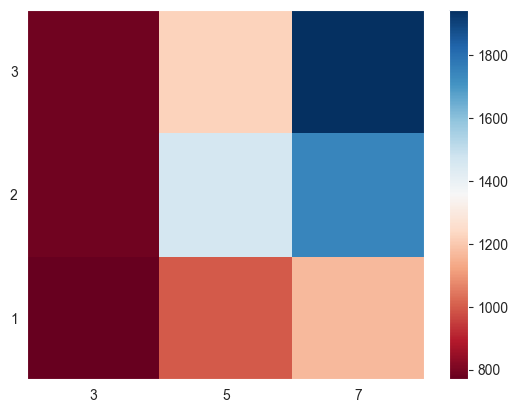

In [20]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap="RdBu")

row_labels = grouped_pivot.columns.levels[1]    # CPU_core
col_labels = grouped_pivot.index    # GPU

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

## Task 4 - Pearson Correlation and P-values

<p>Use the <code>scipy.stats.pearsonr()</code> function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.</p>

In [21]:
count = 1
for parameter in ["RAM_GB", "CPU_frequency", "Storage_GB_SSD", "Screen_Size_inch", "Weight_pounds", "CPU_core", "OS", "GPU", "Category"]:
    pearson_coef, p_value = stats.pearsonr(df[parameter], df["Price"])
    print(f"{count}. The Pearson Correlation Coefficient for {parameter} is {pearson_coef} with a P-value of {p_value}.", end="\n\n")
    count += 1

1. The Pearson Correlation Coefficient for RAM_GB is 0.5492972971857844 with a P-value of 3.681560628842808e-20.

2. The Pearson Correlation Coefficient for CPU_frequency is 0.36666555892588604 with a P-value of 5.502463350713339e-09.

3. The Pearson Correlation Coefficient for Storage_GB_SSD is 0.243420755218103 with a P-value of 0.00014898923191724144.

4. The Pearson Correlation Coefficient for Screen_Size_inch is -0.11064420817118266 with a P-value of 0.0885339784683062.

5. The Pearson Correlation Coefficient for Weight_pounds is -0.05031225837751549 with a P-value of 0.43976938534338894.

6. The Pearson Correlation Coefficient for CPU_core is 0.4593977773355115 with a P-value of 7.912950127009359e-14.

7. The Pearson Correlation Coefficient for OS is -0.22172980114827384 with a P-value of 0.000569664255924674.

8. The Pearson Correlation Coefficient for GPU is 0.2882981988881427 with a P-value of 6.166949698364559e-06.

9. The Pearson Correlation Coefficient for Category is 0.286

****
This is the end of the file.
****